In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.neighbors
%matplotlib inline

In [4]:
# Load the data
oecd_bli = pd.read_csv("..\\Github_Files\\datasets\\lifesat\\oecd_bli_2015.csv")
gdp_per_capita = pd.read_csv("..\\Github_Files\\datasets\\lifesat\\gdp_per_capita.csv", 
                            thousands = ',',
                            delimiter = '\t',
                            encoding = 'latin1',
                            na_values = 'n/a')

In [12]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    #gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [13]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

<AxesSubplot:xlabel='GDP per capita', ylabel='Life satisfaction'>

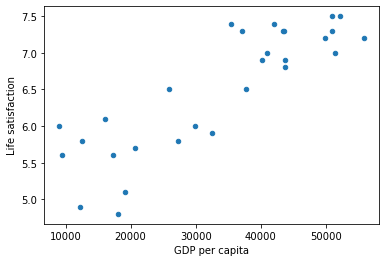

In [18]:
# Display a scatterplot to visualise the data
country_stats.plot(kind = "scatter", x = 'GDP per capita', y = 'Life satisfaction')

In [23]:
# Select a linear model
model_lm = sklearn.linear_model.LinearRegression()

# or

# Select an instance based model
model_kn = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)

# Fit the models to the training data
model_lm.fit(X, y)
model_kn.fit(X, y)

# Predict the life satisfaction of a new input
X_new = [[22587]]
print(model_lm.predict(X_new))
print(model_kn.predict(X_new))

[[5.96242338]]
[[5.76666667]]


### Exercises:

<ui>1. Machine learning is the process of modelling a system of data using statistical techniques that allows for new data to improve the descriptive and predictive ability of the model.<br>

<ui>2. Machine learning is most effective in situations where:<br>
&ensp;a. Problems exist with long lists of rules or that require a lot of hand tuning.<br>
&ensp;b. Problems where a traditional approach cannot determine a solution.<br>
&ensp;c. Problems that emerge from fluctuating environments with new and novel data.<br>
&ensp;d. Insights are needed from complex problems or from large amounts of data.<br>

<ui>3. A labeled training set is a set of data that is used to train a predictive model using a target variable contained in the dataset.<br>
    
<ui>4. The 2 most common supervised tasks are regression (predicting a numeric value) and classification (predicting the class of an observation).<br>
    
<ui>5. 4 common unsupercised tasks are: clustering (detecting and categorising observations with similar attributes), anomaly detection (detecting observations that are unusual in a sample vs typical "trained" observations), dimensionality reduction (identifying the attributes that explain the highest/lowest proportions of the variance in a sample), association rules (developing rules of common sequences/groupings of events i.e. buy A then likely to buy B then C)<br>
    
<ui>6. A reinforcement learning algorithm should be used to teach a robot to walk in unknown terrain.<br>

<ui>7. A clustering algorithm should be used to segment customers into similar groups.<br>
    
<ui>8. Spam detection is a supervised learning problem as the model will be trained to classify emails as spam or not spam using labeled training data.<br>

<ui>9. An online learning system is one that learns incrementally from new data as it is processed by the model using either individual observations or mini-batches of observations.<br>

<ui>10. Out of core training is a form of online learning where the training data is too large to fit in memory. The model is trained using sequential chunks of the data until the whole dataset has been used to form part of a training cycle.<br>

<ui>11. Instance based models rely on a similarity measure to make predictions e.g. KNN<br>
    
<ui>12. A model parameter is a parameter of the model itself e.g. the intercept or slope in a linear regression, where a hyperparameter is a parameter of the learning alogrithm e.g. regularisation rate in logistic regression.<br>
  
<ui>13. Model based algorithms search for the model parameters that will minimise an associated cost function or maximise an associated fitness function. They make predictions by applying the function described using the found parameters to the new or existing observations.<br>
    
<ui>14. The 4 main challenges of machine learning are - Insufficient quantity of data, non-representative data (data that has bias towards a certain class in the sample and underrepresents other classes), poor quality data (data full of outliers, errors, missing data, noise), data with irrelevant features and also bad algorithms that either under or over fit the model to the training data.<br>
  
<ui>15. In this case, the model has been poorly fit to the data. Possible solutions include: increase the amount of data in the training set to give the model a more representative base, controlling the constraints on a model to simplify the model e.g. tuning the algorithms hyperparameters to control regularisation rate, feeding better features to the model.<br>
    
<ui>16. A test set is a portion of the training data that is held back to perform validation of the trained model.<br>
    
<ui>17. A validation set is used to estimate prediction error for model selection.<br>
    
<ui>18. Typically a test set is smaller than a training set, so tuning hyperparameters with the test set can lead to porr generalisation of the model.<br>
    
<ui>19. Repeated cross validation is preferrable to a single validation set as it gives a much more accurate measure of the performance of the model. A single validation set can suffer from sampling errors or bias whereas the repeated cross validation is performed multiple times across the entire dataset.<br>